<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
!pip install jupyter


   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ---------------------------------------- 139.8/139.8 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.6 MB 20.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.4/11.6 MB 17.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.3/11.6 MB 18.3 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/11.6 MB 18.5 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.6 MB 18.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/11.6 MB 17.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.4/11.6 MB 18.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.6 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 16.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.7/11.6 MB 17.0 MB/s eta 0:00:01


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


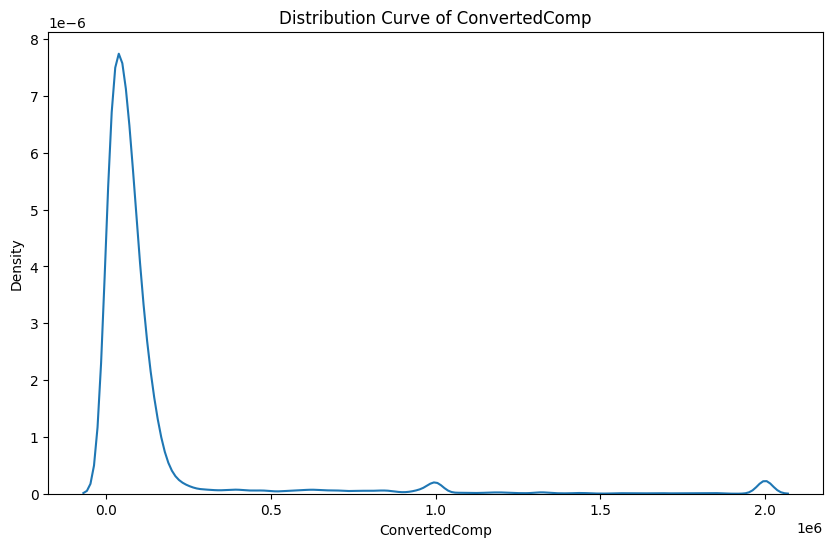

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution curve
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), bw_adjust=0.5)
plt.title('Distribution Curve of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


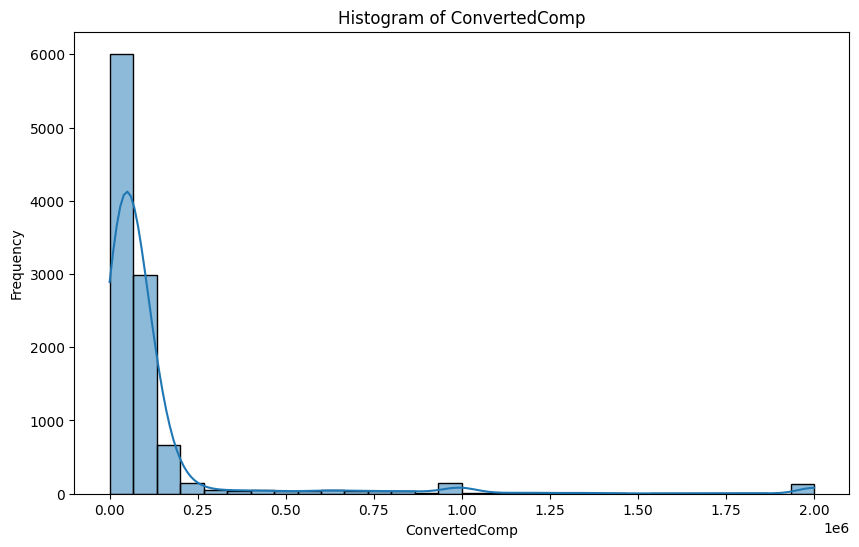

In [5]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=30, kde=True)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
median_converted_comp = df['ConvertedComp'].median()
print(f"The median of the column 'ConvertedComp' is: {median_converted_comp}")


The median of the column 'ConvertedComp' is: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
num_men = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders identified themselves only as a Man: {num_men}")


Number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median 'ConvertedComp' for responders identified themselves only as a Woman is: {median_converted_comp_woman}")


The median 'ConvertedComp' for responders identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
five_num_summary_age = df['Age'].describe()
print(f"The five number summary for the column 'Age' is:\n{five_num_summary_age}")


The five number summary for the column 'Age' is:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


In [10]:
five_num_summary_age = df['Age'].describe()
print(f"The five number summary for the column 'Age' is:\n{five_num_summary_age}")


The five number summary for the column 'Age' is:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


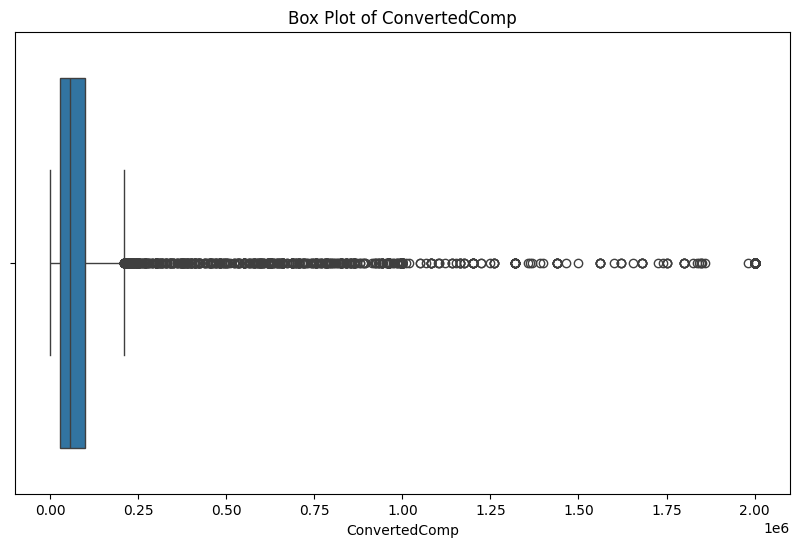

In [11]:
# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"The Inter Quartile Range (IQR) for 'ConvertedComp' is: {IQR}")


The Inter Quartile Range (IQR) for 'ConvertedComp' is: 73132.0


Find out the upper and lower bounds.


In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")


The lower bound is: -82830.0
The upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in 'ConvertedComp': {num_outliers}")


Number of outliers in 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")


Number of rows after removing outliers: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# Filter for numeric columns only
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Calculate correlation between Age and other numeric columns
correlations = numeric_df.corr()['Age'].drop('Age')
print(f"Correlation between 'Age' and other numerical columns:\n{correlations}")


Correlation between 'Age' and other numerical columns:
Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
